In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
office_path = "../resources/the_office_series.csv"
lines_path = "../resources/the_office_lines_v3.csv"

# Read the data 
office_data = pd.read_csv(office_path)
lines_data = pd.read_csv(lines_path, encoding = "ISO-8859-1")


In [2]:
# Display the data table for the office data
office_df = pd.DataFrame(office_data)

office_df.head()

,Season,Episode,Title,IMDB Rating,Total Votes,Air Date
0,1,1,Pilot,7.6,3706,24 Mar 2005
1,1,2,Diversity Day,8.3,3566,29 Mar 2005
2,1,3,Health Care,7.9,2983,5 Apr 2005
3,1,4,The Alliance,8.1,2886,12 Apr 2005
4,1,5,Basketball,8.4,3179,19 Apr 2005


In [3]:
# Display the data table for the lines data
lines_df = pd.DataFrame(lines_data)

lines_df.head()

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done."


## The Office Season Popuarity

In [4]:
#Rank the seasons by user ratings
season_pop = office_df.groupby(["Season"]).mean()["IMDB Rating"]

season_df = pd.DataFrame(season_pop).sort_values(by="IMDB Rating", ascending=False).round(2)
season_df

,IMDB Rating
Season,
4,8.60
3,8.57
5,8.49
2,8.44
7,8.32
6,8.22
1,8.02
9,7.96
8,7.67


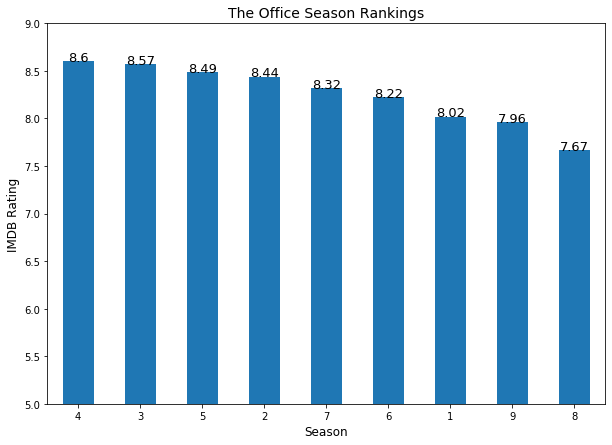

In [40]:
#Create bar chart of season rankings
ax = season_df.plot(kind="bar", figsize=(10,7), rot=0, legend=False, fontsize = 10)

# Create and format value labels
for col in season_df.columns:
    for id, val in enumerate(season_df['IMDB Rating']):
        ax.text(id, val, round(val,2), fontsize=13, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("The Office Season Rankings", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("IMDB Rating", fontsize=12)
plt.ylim(5.0, 9)


# Save image
plt.savefig("../images/season_rankings.png")

plt.show()

## Ranking by Episode

In [11]:
episode_all_df = pd.DataFrame(office_df).sort_values(by='IMDB Rating', ascending=False).round(2)

top_episode_df = (episode_all_df)
top_episode_df.head(15)

,Season,Episode,Title,IMDB Rating,Total Votes,Air Date
187,9,23,Finale,9.7,7934,16 May 2013
137,7,21,"Goodbye, Michael",9.7,5749,28 Apr 2011
77,5,13,Stress Relief,9.6,5948,1 Feb 2009
27,2,22,Casino Night,9.3,3644,11 May 2006
186,9,22,A.A.R.M.,9.3,2860,9 May 2013
132,7,16,Threat Level Midnight,9.3,3525,17 Feb 2011
95,6,5,Niagara: Part 2,9.3,1946,8 Oct 2009
64,4,14,"Goodbye, Toby",9.3,3010,15 May 2008
59,4,9,Dinner Party,9.3,4095,10 Apr 2008
50,3,23,The Job,9.3,3010,17 May 2007


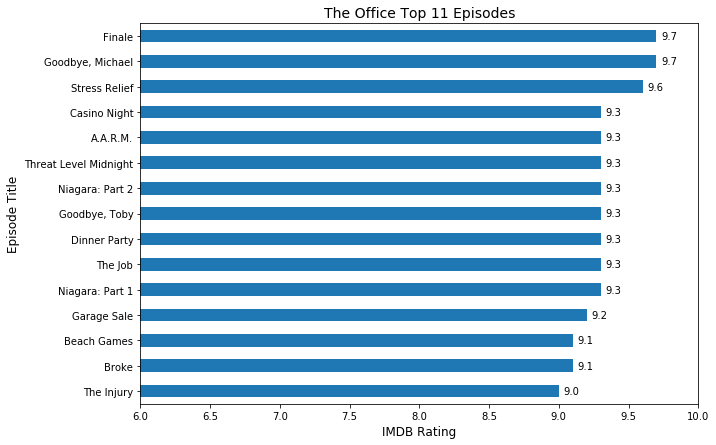

In [18]:
#Create bar chart of season rankings
ax = top_episode_df.iloc[0:15].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 11 Episodes", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/episode_rankings.png")

plt.show()

## Number of Episodes per Season

In [41]:
# Count of the number of episodes by seasson
eps_per_season = office_df.groupby(["Season"]).count()["Episode"]

per_season_df = pd.DataFrame(eps_per_season)
per_season_df

,Episode
Season,
1,6
2,22
3,23
4,14
5,26
6,26
7,24
8,24
9,23


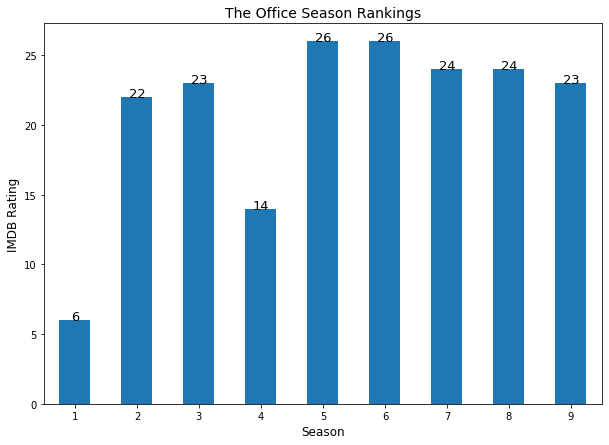

In [45]:
#Create bar chart of the number of episodes per season
ax = per_season_df.plot(kind="bar", figsize=(10,7), rot=0, legend=False, fontsize = 10)

# Create and format value labels
for col in per_season_df.columns:
    for id, val in enumerate(per_season_df['Episode']):
        ax.text(id, val, round(val,2), fontsize=13, ha='center', va='baseline', color = 'black')
        

# Format chart
plt.title("The Office Season Rankings", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("IMDB Rating", fontsize=12)


# Save image
plt.savefig("../images/eps_per_season.png")

plt.show()

## Characters With Most Lines

In [67]:
lines_all = lines_df.groupby(["speaker"]).count()["line"]

lines_all_df= pd.DataFrame(lines_all).sort_values(by="line", ascending=False)
lines_all_df.head(10)

,line
speaker,
Michael,10799
Dwight,6759
Jim,6226
Pam,4978
Andy,3699
Angela,1536
Kevin,1535
Erin,1413
Oscar,1336


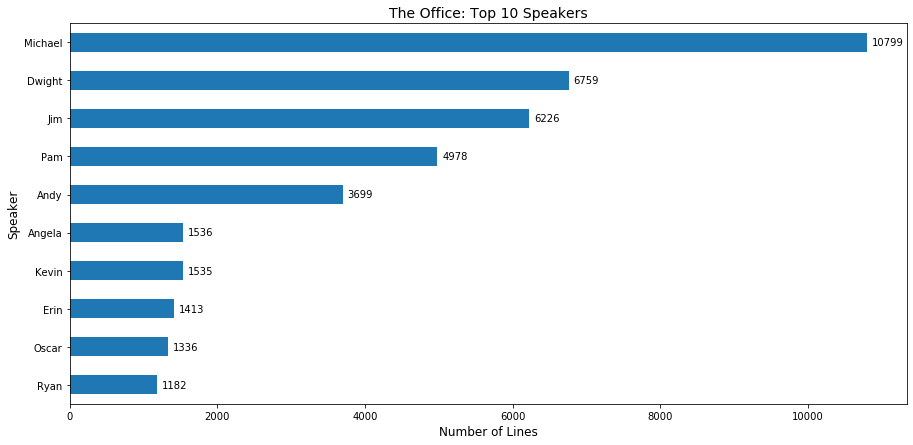

In [98]:
#Create bar chart of season rankings
ax = lines_all_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/top_speakers.png")

plt.show()

## Number of lines per season

In [110]:
s1_lines_breakout = (lines_df[lines_df['season'] == 1]).reset_index(drop=True)
s2_lines_breakout = (lines_df[lines_df['season'] == 2]).reset_index(drop=True)
s3_lines_breakout = (lines_df[lines_df['season'] == 3]).reset_index(drop=True)
s4_lines_breakout = (lines_df[lines_df['season'] == 4]).reset_index(drop=True)
s5_lines_breakout = (lines_df[lines_df['season'] == 5]).reset_index(drop=True)
s6_lines_breakout = (lines_df[lines_df['season'] == 6]).reset_index(drop=True)
s7_lines_breakout = (lines_df[lines_df['season'] == 7]).reset_index(drop=True)
s8_lines_breakout = (lines_df[lines_df['season'] == 8]).reset_index(drop=True)
s9_lines_breakout = (lines_df[lines_df['season'] == 9]).reset_index(drop=True)


### Season 1

In [108]:
s1_lines = s1_lines_breakout.groupby(["speaker"]).count()["line"]

s1_lines_df= pd.DataFrame(s1_lines).sort_values(by="line", ascending=False)
s1_lines_df.head(10)

,line
speaker,
Michael,490
Jim,228
Dwight,208
Pam,162
Katy,58
Oscar,42
Jan,38
Ryan,37
Mr. Brown,36


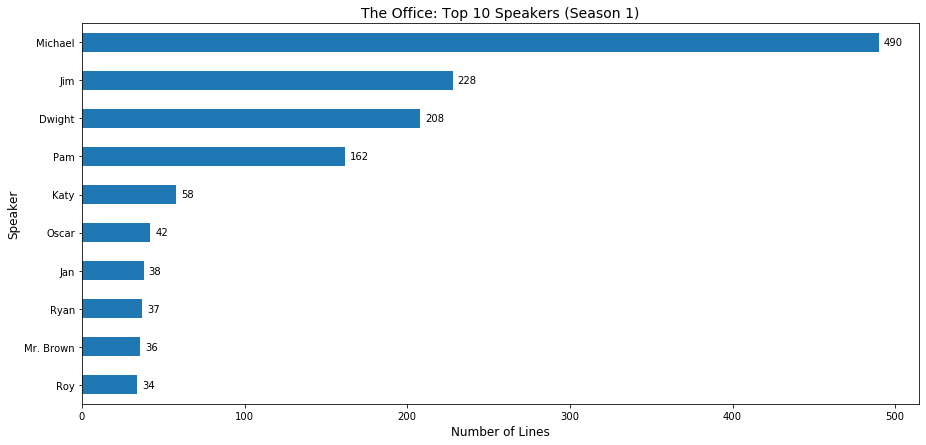

In [109]:
#Create bar chart of season rankings
ax = s1_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 1)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s1_speakers.png")

plt.show()

## Season 2

In [111]:
s2_lines = s2_lines_breakout.groupby(["speaker"]).count()["line"]

s2_lines_df= pd.DataFrame(s2_lines).sort_values(by="line", ascending=False)
s2_lines_df.head(10)

,line
speaker,
Michael,1837
Dwight,815
Jim,744
Pam,611
Jan,234
Ryan,163
Angela,131
Kevin,117
Toby,103


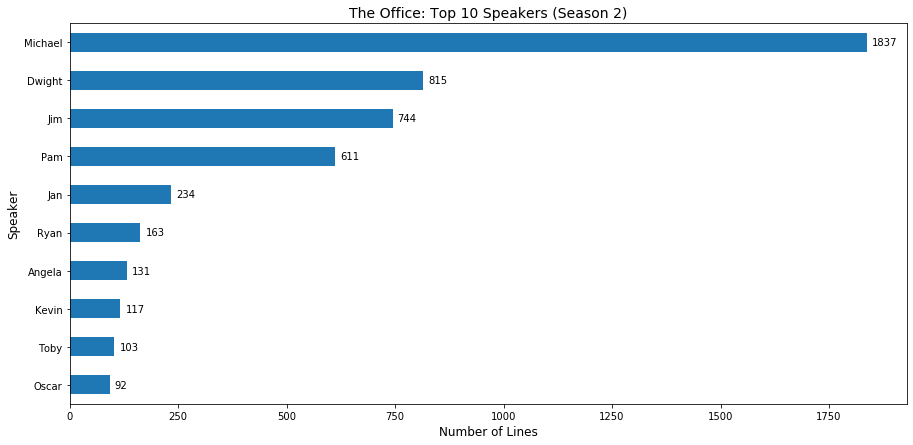

In [112]:
#Create bar chart of season rankings
ax = s2_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 2)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s2_speakers.png")

plt.show()

### Season 3

In [114]:
s3_lines = s3_lines_breakout.groupby(["speaker"]).count()["line"]

s3_lines_df= pd.DataFrame(s3_lines).sort_values(by="line", ascending=False)
s3_lines_df.head(10)

,line
speaker,
Michael,1702
Dwight,808
Jim,680
Pam,593
Andy,300
Karen,275
Jan,255
Angela,196
Kevin,161


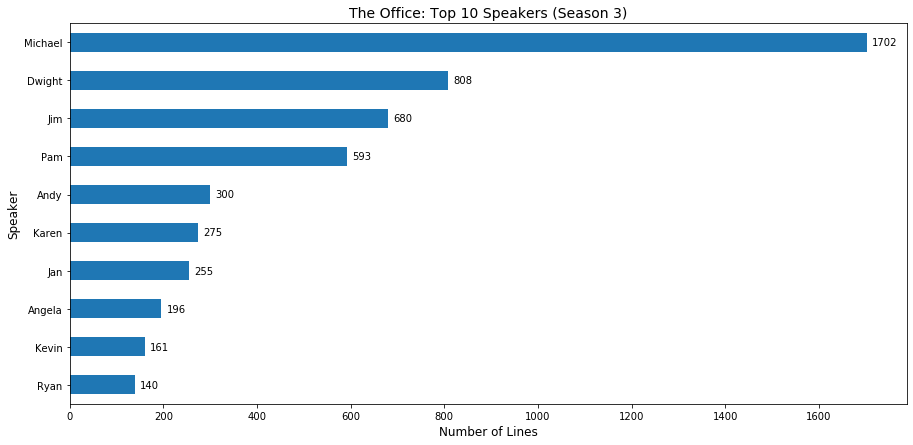

In [115]:
#Create bar chart of season rankings
ax = s3_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 3)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s3_speakers.png")

plt.show()

### Season 4

In [116]:
s4_lines = s4_lines_breakout.groupby(["speaker"]).count()["line"]

s4_lines_df= pd.DataFrame(s4_lines).sort_values(by="line", ascending=False)
s4_lines_df.head(10)

,line
speaker,
Michael,1378
Jim,574
Dwight,474
Pam,437
Ryan,201
Jan,184
Andy,184
Angela,167
Kevin,125


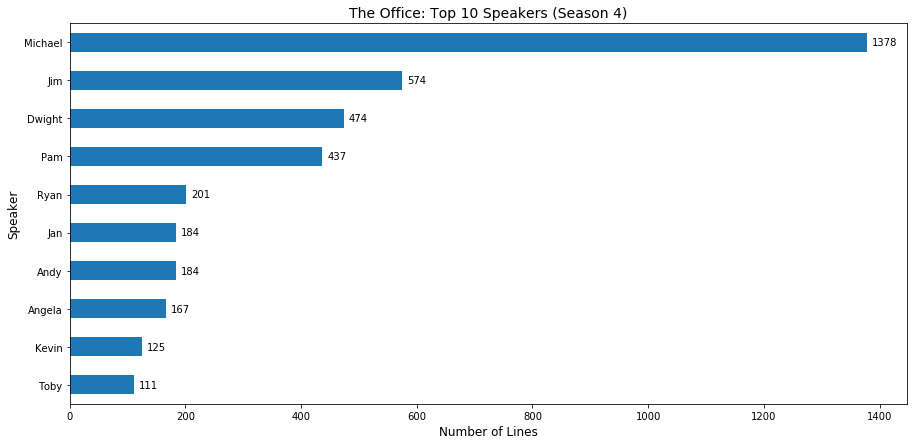

In [117]:
#Create bar chart of season rankings
ax = s4_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 4)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s4_speakers.png")

plt.show()

### Season 5

In [118]:
s5_lines = s5_lines_breakout.groupby(["speaker"]).count()["line"]

s5_lines_df= pd.DataFrame(s5_lines).sort_values(by="line", ascending=False)
s5_lines_df.head(10)

,line
speaker,
Michael,2063
Dwight,1026
Jim,835
Pam,696
Andy,477
Charles,222
Holly,222
Angela,206
Oscar,195


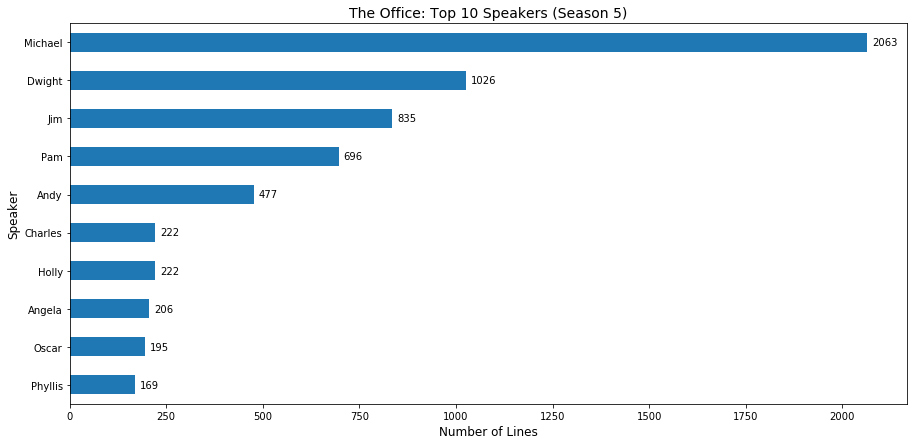

In [119]:
#Create bar chart of season rankings
ax = s5_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 5)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s5_speakers.png")

plt.show()

### Season 6

In [124]:
s6_lines = s6_lines_breakout.groupby(["speaker"]).count()["line"]

s6_lines_df= pd.DataFrame(s6_lines).sort_values(by="line", ascending=False)
s6_lines_df.head(10)

,line
speaker,
Michael,1901
Jim,889
Dwight,777
Pam,674
Andy,501
Erin,279
Kevin,220
Oscar,156
Jo,138


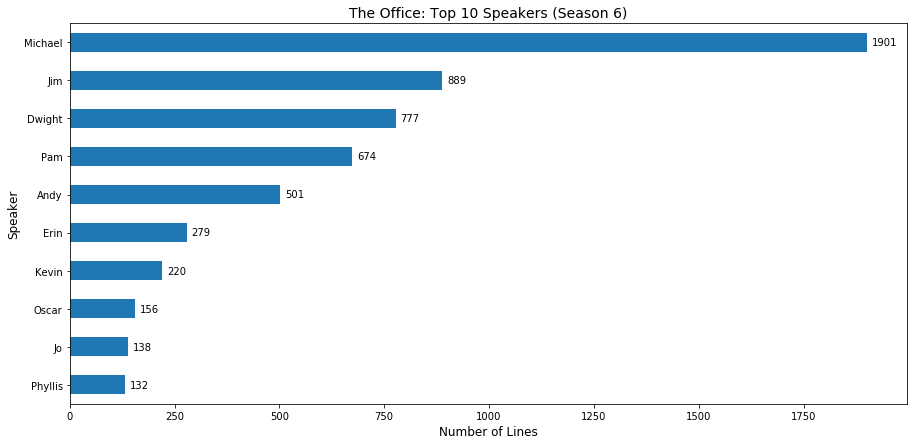

In [125]:
#Create bar chart of season rankings
ax = s6_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 6)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s6_speakers.png")

plt.show()

### Season 7

In [126]:
s7_lines = s7_lines_breakout.groupby(["speaker"]).count()["line"]

s7_lines_df= pd.DataFrame(s7_lines).sort_values(by="line", ascending=False)
s7_lines_df.head(10)

,line
speaker,
Michael,1426
Dwight,694
Jim,677
Pam,618
Andy,551
Erin,308
Holly,265
Kevin,240
Darryl,226


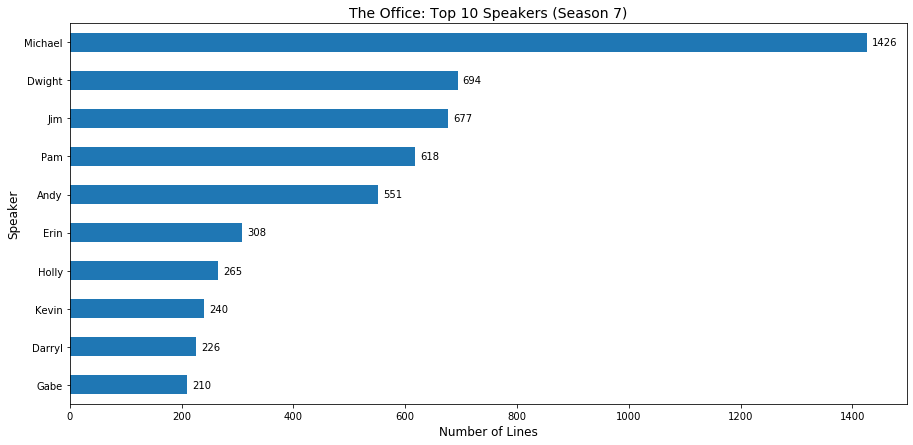

In [127]:
#Create bar chart of season rankings
ax = s7_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 7)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s7_speakers.png")

plt.show()

### Season 8

In [131]:
s8_lines = s8_lines_breakout.groupby(["speaker"]).count()["line"]

s8_lines_df= pd.DataFrame(s8_lines).sort_values(by="line", ascending=False)
s8_lines_df.head(10)

,line
speaker,
Andy,1049
Dwight,897
Jim,803
Pam,456
Erin,396
Robert,380
Darryl,298
Nellie,232
Kevin,228


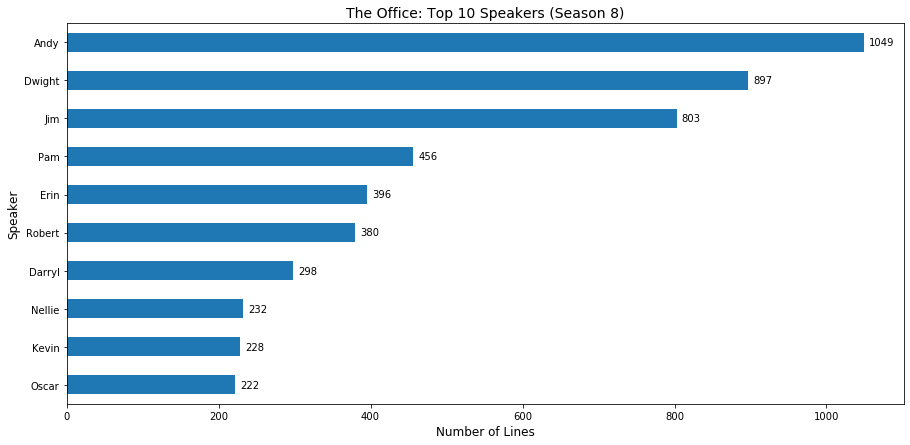

In [132]:
#Create bar chart of season rankings
ax = s8_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 8)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s8_speakers.png")

plt.show()

### Season 9

In [133]:
s9_lines = s9_lines_breakout.groupby(["speaker"]).count()["line"]

s9_lines_df= pd.DataFrame(s9_lines).sort_values(by="line", ascending=False)
s9_lines_df.head(10)

,line
speaker,
Dwight,1060
Jim,796
Pam,731
Andy,637
Angela,379
Erin,377
Oscar,294
Nellie,286
Darryl,275


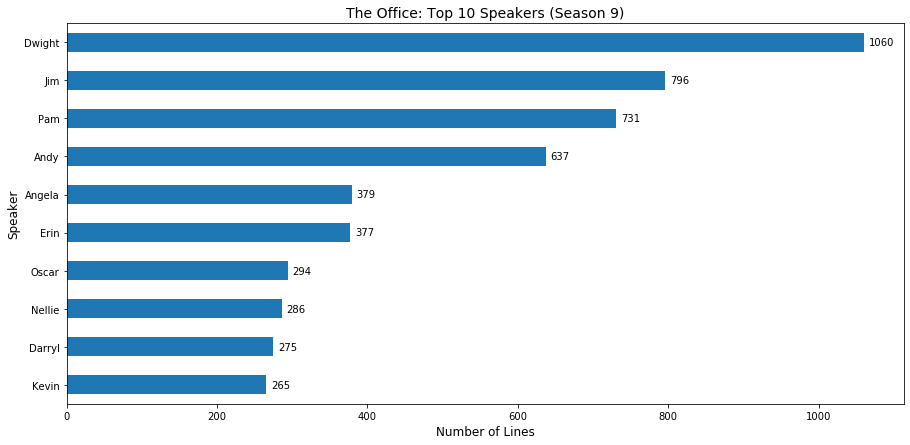

In [134]:
#Create bar chart of season rankings
ax = s9_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 9)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s9_speakers.png")

plt.show()